# **Credit card Fraud Detection using Machine Learning**

## **01. Importing necessary Libraries**

In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import joblib

## **02. Load the Dataset**

In [2]:
# drive.mount('/content/drive')

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Data Sets/Credit Card Fraud Detection/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

## **03. Data Preprocessing & Exploratory Data Analysis**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
# Feature Scaling
sc = StandardScaler()
df['Amount']=sc.fit_transform(pd.DataFrame(df['Amount']))

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [8]:
# Drop unnecessary features
df.drop(['Time'], axis=1, inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [9]:
# Check if there are any duplicated rows in the DataFrame
df.duplicated().any()

True

In [10]:
# Remove duplicate rows from the DataFrame
df = df.drop_duplicates()

In [11]:
df.shape

(275663, 30)

In [12]:
df['Class'].value_counts()

0    275190
1       473
Name: Class, dtype: int64

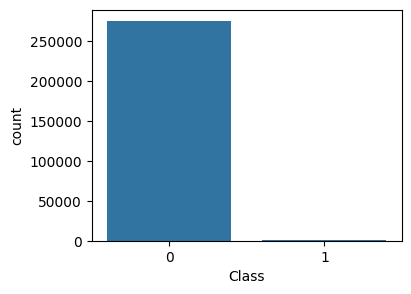

In [13]:
plt.figure(figsize=(4, 3))
sns.countplot(x='Class', data=df)
plt.show()



*   **The class distribution is highly imbalanced,** with the number of legitimate transactions (class 0) being much greater than fraudulent transactions (class 1).



## **04. Data Splitting for Model Training and Evaluation**

In [14]:
x = df.drop('Class', axis=1)
y = df['Class']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

## **05. Handling Imbalanced Dataset**

### **5.1 Undersampling**

In [16]:
# Filter the DataFrame to extract non-fraudulent transactions
normal = df[df['Class'] == 0]

# Filter the DataFrame to extract fraudulent transactions
fraud = df[df['Class'] == 1]

In [17]:
print("Normal Data Shape:", normal.shape)
print("Fraud Data Shape:", fraud.shape)

Normal Data Shape: (275190, 30)
Fraud Data Shape: (473, 30)


In [18]:
# Sample the normal data to match the size of the fraudulent data, ensuring balanced classes
normal_sample = normal.sample(n=473)

print("Normal Data Shape:", normal_sample.shape)
print("Fraud Data Shape:", fraud.shape)

Normal Data Shape: (473, 30)
Fraud Data Shape: (473, 30)


In [19]:
undersample_df = pd.concat([normal_sample, fraud], ignore_index=True)
undersample_df = undersample_df.sample(frac=1)  # Reshuffle Dataset

In [20]:
x_undersample = undersample_df.drop('Class', axis=1)
y_undersample = undersample_df['Class']

In [21]:
xu_train, xu_test, yu_train, yu_test = train_test_split(x_undersample, y_undersample, test_size=0.2, random_state=0)

#### **5.1.1 Perform logistic regression on undersampled data**

In [22]:
lr = LogisticRegression()
lr.fit(xu_train,yu_train)

LogisticRegression()

In [23]:
yu_pred_lr = lr.predict(xu_test)
print("Accuracy score on undersampled data:", accuracy_score(yu_test,yu_pred_lr))
print("Precision score on undersampled data:", precision_score(yu_test,yu_pred_lr))
print("Recall score on undersampled data:", recall_score(yu_test,yu_pred_lr))
print("F1 score on undersampled data:", f1_score(yu_test,yu_pred_lr))

Accuracy score on undersampled data: 0.9578947368421052
Precision score on undersampled data: 1.0
Recall score on undersampled data: 0.9183673469387755
F1 score on undersampled data: 0.9574468085106383


#### **5.1.2 Apply Decision Tree Classifier on Undersampled Data**

In [24]:
dt = DecisionTreeClassifier()
dt.fit(xu_train,yu_train)

DecisionTreeClassifier()

In [25]:
yu_pred_dt = dt.predict(xu_test)
print("Accuracy score on undersampled data:", accuracy_score(yu_test,yu_pred_dt))
print("Precision score on undersampled data:", precision_score(yu_test,yu_pred_dt))
print("Recall score on undersampled data:", recall_score(yu_test,yu_pred_dt))
print("F1 score on undersampled data:", f1_score(yu_test,yu_pred_dt))

Accuracy score on undersampled data: 0.9052631578947369
Precision score on undersampled data: 0.9
Recall score on undersampled data: 0.9183673469387755
F1 score on undersampled data: 0.9090909090909091


#### **5.1.2 Apply Random Forest Classifier on Undersampled Data**

In [26]:
rf = RandomForestClassifier()
rf.fit(xu_train,yu_train)

RandomForestClassifier()

In [27]:
yu_pred_rf = rf.predict(xu_test)
print("Accuracy score on undersampled data:", accuracy_score(yu_test,yu_pred_rf))
print("Precision score on undersampled data:", precision_score(yu_test,yu_pred_rf))
print("Recall score on undersampled data:", recall_score(yu_test,yu_pred_rf))
print("F1 score on undersampled data:", f1_score(yu_test,yu_pred_rf))

Accuracy score on undersampled data: 0.9368421052631579
Precision score on undersampled data: 0.9777777777777777
Recall score on undersampled data: 0.8979591836734694
F1 score on undersampled data: 0.9361702127659575


In [28]:
final_accuracies_u = pd.DataFrame({'Models':['Logistic Regression','Decision Trees','Random Forest'],
              "Accuracy":[accuracy_score(yu_test,yu_pred_lr)*100,
                     accuracy_score(yu_test,yu_pred_dt)*100,
                     accuracy_score(yu_test,yu_pred_rf)*100
                    ]})

final_accuracies_u

,Models,Accuracy
0,Logistic Regression,95.789474
1,Decision Trees,90.526316
2,Random Forest,93.684211


### **5.2 Oversampling**

In [29]:
# Filter the DataFrame to extract non-fraudulent transactions
normal = df[df['Class'] == 0]

# Filter the DataFrame to extract fraudulent transactions
fraud = df[df['Class'] == 1]

In [30]:
print("Normal Data Shape:", normal.shape)
print("Fraud Data Shape:", fraud.shape)

Normal Data Shape: (275190, 30)
Fraud Data Shape: (473, 30)


In [31]:
smt = SMOTE()
x_oversample, y_oversample = smt.fit_resample(x, y)

In [32]:
y_oversample.value_counts()

0    275190
1    275190
Name: Class, dtype: int64

In [33]:
xo_train, xo_test, yo_train, yo_test = train_test_split(x_oversample, y_oversample, test_size=0.2, random_state=0)

#### **5.2.1 Perform logistic regression on Oversampled data**

In [34]:
lr = LogisticRegression()
lr.fit(xo_train,yo_train)

LogisticRegression()

In [35]:
yo_pred_lr = lr.predict(xo_test)
print("Accuracy score on oversampled data:", accuracy_score(yo_test,yo_pred_lr))
print("Precision score on oversampled data:", precision_score(yo_test,yo_pred_lr))
print("Recall score on oversampled data:", recall_score(yo_test,yo_pred_lr))
print("F1 score on oversampled data:", f1_score(yo_test,yo_pred_lr))

Accuracy score on oversampled data: 0.9446109960391003
Precision score on oversampled data: 0.9728654473821433
Recall score on oversampled data: 0.9147931573021465
F1 score on oversampled data: 0.9429360288268052


#### **5.2.2 Apply Decision Tree Classifier on Oversampled Data**

In [36]:
dt = DecisionTreeClassifier()
dt.fit(xo_train,yo_train)

DecisionTreeClassifier()

In [37]:
yo_pred_dt = dt.predict(xo_test)
print("Accuracy score on oversampled data:", accuracy_score(yo_test,yo_pred_dt))
print("Precision score on oversampled data:", precision_score(yo_test,yo_pred_dt))
print("Recall score on oversampled data:", recall_score(yo_test,yo_pred_dt))
print("F1 score on oversampled data:", f1_score(yo_test,yo_pred_dt))

Accuracy score on oversampled data: 0.9984919510156619
Precision score on oversampled data: 0.9979140214039542
Recall score on oversampled data: 0.9990738386663277
F1 score on oversampled data: 0.9984935932338741


#### **5.2.2 Apply Random Forest Classifier on Oversampled Data**

In [38]:
rf = RandomForestClassifier()
rf.fit(xo_train,yo_train)

RandomForestClassifier()

In [39]:
yo_pred_rf = rf.predict(xo_test)
print("Accuracy score on undersampled data:", accuracy_score(yo_test,yo_pred_rf))
print("Precision score on undersampled data:", precision_score(yo_test,yo_pred_rf))
print("Recall score on undersampled data:", recall_score(yo_test,yo_pred_rf))
print("F1 score on undersampled data:", f1_score(yo_test,yo_pred_rf))

Accuracy score on undersampled data: 0.999918238308078
Precision score on undersampled data: 0.9998365864729913
Recall score on undersampled data: 1.0
F1 score on undersampled data: 0.999918286559955


In [40]:
final_accuracies_o = pd.DataFrame({'Models':['Logistic Regression','Decision Trees','Random Forest'],
              "Accuracy":[accuracy_score(yo_test,yo_pred_lr)*100,
                     accuracy_score(yo_test,yo_pred_dt)*100,
                     accuracy_score(yo_test,yo_pred_rf)*100
                    ]})

final_accuracies_o

,Models,Accuracy
0,Logistic Regression,94.461100
1,Decision Trees,99.849195
2,Random Forest,99.991824


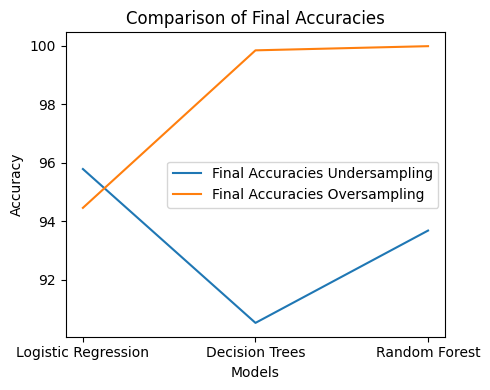

In [50]:
plt.figure(figsize=(5, 4))

# Plotting the data from final_accuracies on Undersampling
plt.plot(final_accuracies_u["Models"], final_accuracies_u["Accuracy"], label="Final Accuracies Undersampling")

# Plotting the data from final_accuracies on Oversampling
plt.plot(final_accuracies_o["Models"], final_accuracies_o["Accuracy"], label="Final Accuracies Oversampling")

# Adding labels and title
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Comparison of Final Accuracies")
plt.legend()  # Show legend

# Show the plot
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

As we can see, the Random Forest Classifier with oversampling is the best model for performing predictions.

## **06. Save the Model**

In [53]:
# train the best model for entire dataset
rf_best = RandomForestClassifier()
rf_best.fit(x_oversample, y_oversample)

RandomForestClassifier()

In [55]:
joblib.dump(rf_best,"credit_Card_Fraud_Detection_Model")

['credit_Card_Fraud_Detection_Model']

In [56]:
model = joblib.load("credit_Card_Fraud_Detection_Model")

In [57]:
x_oversample.shape

(550380, 29)

In [58]:
y_oversample.shape

(550380,)

In [96]:
pred_array = np.array([-2.31223, 1.051002, -160985, 3.907506, -0.52219, -1.42656, -2.58730, 1.301557, -2.77000, -2.77227, 3.202033, -2.80001, -0.50502, -4.28925, 0.989724, -1.14075, -2.83006, -0.01682, 0.416956, 0.12, 0.126011, 0.517232, -0.03505, -0.46521, 0.320198, 0.044519, 0.17784, 0.261145, -0.14328]).reshape(1,29)

In [97]:
prediction = model.predict(pred_array)
prediction

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

In [98]:
if prediction == 0:
    print("This is a Legitimate Transaction")
else:
    print("This is a Fraudulent Transaction")

This is a Fraudulent Transaction
